## Against Malaria Foundation
### Analysis of PDCU Data from Dedza District, Malawi
Author: Max Santos

---

The following notebook shows my results from performing data analysis (using Python) on data from the Against Malaria Foundation (AMF) website. AMF help protect people from malaria via the distribution of 'anti-malaria nets (specifically long-lasting insecticidal nets)'.

The aim of my analysis was to attempt to answer several questions including:

- Is there a link between hang up rate of nets, and malaria rates?
- How do these rates change over time, after a distribution of nets?

To do this, I chose to focus on one particular region; the Dedza District in the central region of Malawi. I chose this region simply because it has a full set of Post-Distribution Check-Up (PDCU) data, which is collected via 6-monthly surveys, to assess net usage and condition after a distribution has been made. It was also a location that had a reasonable amount of data points, allowing for more meaningful data analysis. 

---

## Data Acquisition

First, I will 'scrape' data from the AMF website 'Distributions' section. The different sets of data can be found at the following link, under the 'Post-Distribution' section:

https://www.againstmalaria.com/Distribution1.aspx?ProposalID=188 

The surveys for the Dedza District were done at 6-month intervals after the distribution (up to and including 30-months), meaning that there are 5 different sets of data for this location. For each of these sets, I will scrape data from two tables, 'Presence of AMF Nets' and 'Miscellaneous Data', as they contain the information I am interested in.

In [3]:
# import necessary libaries

import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
# 'scrape' data from the website. 
# this loop is performed 5 times, once for each survey.

months = [6,12,18,24,30]
data_dict = {} 

for id in months:
    url = 'https://www.againstmalaria.com/SurveyResults_Live.aspx?ReportStageID={0}&proposalID=188'.format(id)
    print('Processing...', url)
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, "lxml")
    soup.prettify()
    
    main_table=soup.find('table', id="ctl00_ContentPlaceHolder1_ucSurveyResults_TabContainer1_tabAccountingForNets_grdAccounting")
    misc_table=soup.find('table', id="ctl00_ContentPlaceHolder1_ucSurveyResults_TabContainer1_tabMiscellaneous_grdMiscellaneous")
    
    #Generate lists to store columns from main table
    A=[]
    B=[]
    C=[]
    D=[]
    E=[]
    F=[]
    G=[]
    H=[]
    I=[]
    J=[]
    K=[]
    L=[]
    M=[]
    N=[]
    O=[]
    P=[]
    Q=[]
    R=[]
    S=[]
    T=[]
    U=[]

    for row in main_table.findAll("tr"):
        cells = row.findAll('td')
        if len(cells)==21: 
            A.append(cells[0].find(text=True).strip())
            B.append(cells[1].find(text=True).strip())
            C.append(cells[2].find(text=True).strip())
            D.append(cells[3].find(text=True).strip())
            E.append(cells[4].find(text=True).strip())
            F.append(cells[5].find(text=True).strip())
            G.append(cells[6].find(text=True).strip())
            H.append(cells[7].find(text=True).strip())
            I.append(cells[8].find(text=True).strip())
            J.append(cells[9].find(text=True).strip())
            K.append(cells[10].find(text=True).strip())
            L.append(cells[11].find(text=True).strip())
            M.append(cells[12].find(text=True).strip())
            N.append(cells[13].find(text=True).strip())
            O.append(cells[14].find(text=True).strip())
            P.append(cells[15].find(text=True).strip())
            Q.append(cells[16].find(text=True).strip())
            R.append(cells[17].find(text=True).strip())
            S.append(cells[18].find(text=True).strip())
            T.append(cells[19].find(text=True).strip())
            U.append(cells[20].find(text=True).strip())
            
    #convert lists from main table to data frame
    df=pd.DataFrame(A,columns=['Number'])
    df['Location']=B
    df['Date']=C
    df['Households_Target']=D
    df['Households_#']=E
    df['Households_%']=F
    df['Forms_Signed_#']=G
    df['Forms_Signed_%']=H
    df['Nets_Received_#']=I
    df['Hung_#']=J
    df['Hung_%']=K
    df['PresentNotHung_#']=L
    df['PresentNotHung_%']=M
    df['Missing_#']=N
    df['Missing_%']=O
    df['Worn_#']=P
    df['Worn_%']=Q
    df['M+WO_%']=R
    df['Last_Entry']=S
    df['Last_Entry_Date']=T
    df['By']=U
    
    #Generate lists to store data from miscellaneous table
    A2=[]
    B2=[]
    C2=[]
    D2=[]
    E2=[]
    F2=[]
    G2=[]
    H2=[]
    I2=[]
    J2=[]
    K2=[]
    L2=[]

    for row in misc_table.findAll("tr"):
        cells = row.findAll('td')
        if len(cells)==12: #Only extract table body not heading
            A2.append(cells[0].find(text=True).strip())
            B2.append(cells[1].find(text=True).strip())
            C2.append(cells[2].find(text=True).strip())
            D2.append(cells[3].find(text=True).strip())
            E2.append(cells[4].find(text=True).strip())
            F2.append(cells[5].find(text=True).strip())
            G2.append(cells[6].find(text=True).strip())
            H2.append(cells[7].find(text=True).strip())
            I2.append(cells[8].find(text=True).strip())
            J2.append(cells[9].find(text=True).strip())
            K2.append(cells[10].find(text=True).strip())
            L2.append(cells[11].find(text=True).strip())
            
    #convert lists from miscellaneous table to data frame
    df2=pd.DataFrame(A2,columns=['Number'])
    df2['Location']=B2
    df2['Malaria_Households_#']=C2
    df2['Malaria_Households_%']=D2
    df2['Malaria_People_#']=E2
    df2['Malaria_People_%']=F2
    df2['Type_AMF_Oly_#']=G2
    df2['Type_AMF_Perm_#']=H2
    df2['Type_AMF_?_#']=I2
    df2['Type_All_Oly_#']=J2
    df2['Type_All_Perm_#']=K2
    df2['Type_All_?_#']=L2
    
    #join data frames on 'Location' column
    df_merged = pd.merge(df, df2, left_on='Location', right_on='Location')
    df_merged.drop(['Number_x','Last_Entry_Date','Number_y'], axis=1, inplace=True)
    
    #store dataframe in dictionary
    data_dict['{0}_month_data'.format(id)] = df_merged
    
        
print('FINISHED\nFollowing data has been stored in dictionary:\n')
print(data_dict.keys())

Processing... https://www.againstmalaria.com/SurveyResults_Live.aspx?ReportStageID=6&proposalID=188
Processing... https://www.againstmalaria.com/SurveyResults_Live.aspx?ReportStageID=12&proposalID=188
Processing... https://www.againstmalaria.com/SurveyResults_Live.aspx?ReportStageID=18&proposalID=188
Processing... https://www.againstmalaria.com/SurveyResults_Live.aspx?ReportStageID=24&proposalID=188
Processing... https://www.againstmalaria.com/SurveyResults_Live.aspx?ReportStageID=30&proposalID=188
FINISHED
Following data has been stored in dictionary:

dict_keys(['6_month_data', '12_month_data', '18_month_data', '24_month_data', '30_month_data'])


In [5]:
# check for missing data in all dataframes (there is none!)

for key, data in data_dict.items():
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (100*data.isnull().sum()/data.count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage Missing'])
    display(missing_data)    

,Total,Percentage Missing
Type_All_?_#,0,0.0
Missing_%,0,0.0
Date,0,0.0
Households_Target,0,0.0
Households_#,0,0.0
Households_%,0,0.0
Forms_Signed_#,0,0.0
Forms_Signed_%,0,0.0
Nets_Received_#,0,0.0
Hung_#,0,0.0


,Total,Percentage Missing
Type_All_?_#,0,0.0
Missing_%,0,0.0
Date,0,0.0
Households_Target,0,0.0
Households_#,0,0.0
Households_%,0,0.0
Forms_Signed_#,0,0.0
Forms_Signed_%,0,0.0
Nets_Received_#,0,0.0
Hung_#,0,0.0


,Total,Percentage Missing
Type_All_?_#,0,0.0
Missing_%,0,0.0
Date,0,0.0
Households_Target,0,0.0
Households_#,0,0.0
Households_%,0,0.0
Forms_Signed_#,0,0.0
Forms_Signed_%,0,0.0
Nets_Received_#,0,0.0
Hung_#,0,0.0


,Total,Percentage Missing
Type_All_?_#,0,0.0
Missing_%,0,0.0
Date,0,0.0
Households_Target,0,0.0
Households_#,0,0.0
Households_%,0,0.0
Forms_Signed_#,0,0.0
Forms_Signed_%,0,0.0
Nets_Received_#,0,0.0
Hung_#,0,0.0


,Total,Percentage Missing
Type_All_?_#,0,0.0
Missing_%,0,0.0
Date,0,0.0
Households_Target,0,0.0
Households_#,0,0.0
Households_%,0,0.0
Forms_Signed_#,0,0.0
Forms_Signed_%,0,0.0
Nets_Received_#,0,0.0
Hung_#,0,0.0


---

## Is there a relationship between hang up rate and malaria rate?

For this I will be looking at the columns 'Hung %', 'Malaria Households %' and 'Malaria People %'. Initially, I will choose one PDCU survey to analyse (none in particular, I chose the 18-month survey). This will be used as an exploratory analysis, and then I will combine all of the 5 PDCUs data together to see if there is an overall relationship.

Note: I believe that 'Hung %' only applies to AMF nets, whereas there are other nets present in the region as well. Therefore, looking at the variable 'Hung_%' may not tell full story. This would be worth looking in to further in future analyses.  

### 18-month PDCU correlation

First I will compute the Pearson Correlation coefficient between all combinations of the three variables I am interested in (mentioned above). 

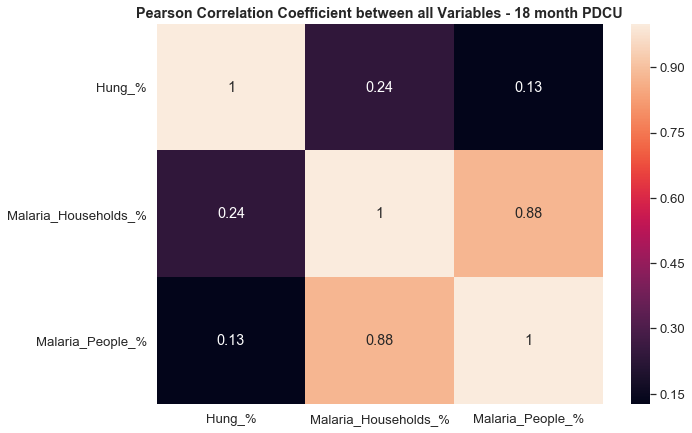

In [6]:
# calculating correlation coefficients and plotting a heatmap

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.2)

corr_columns_18 = data_dict['18_month_data'][['Hung_%','Malaria_Households_%','Malaria_People_%']]
corr_columns_18 = corr_columns_18.apply(pd.to_numeric)

correlation = corr_columns_18.corr()
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(correlation,annot=True)

plt.title('Pearson Correlation Coefficient between all Variables - 18 month PDCU',fontweight='bold')

plt.show()

It can be seen from the heatmap above that there is a very strong correlation between Malaria in People and Malaria in Households (which is expected!). 

There is a small positive correlation between Hung % and the two Malaria rates, however they are not large enough to be significant (at 0.24 and 0.13). 

This correlation (or lack of) can be seen by creating scatter plots of our variables, shown below.

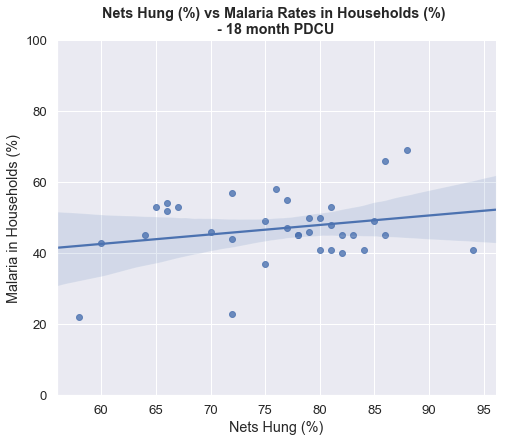

Correlation Coefficient:  0.23700599121018961
Shape of data:  (34, 3)


In [7]:
ax = sns.lmplot( x="Hung_%", y="Malaria_Households_%", data=corr_columns_18, fit_reg=True,
               height=6, aspect=1.2)

plt.title('Nets Hung (%) vs Malaria Rates in Households (%) \n- 18 month PDCU',fontweight='bold')
ax.set(xlabel='Nets Hung (%)', ylabel='Malaria in Households (%)',ylim=(0,100))

plt.show()

print('Correlation Coefficient: ',correlation.loc['Hung_%','Malaria_Households_%'])
print('Shape of data: ',corr_columns_18.shape)

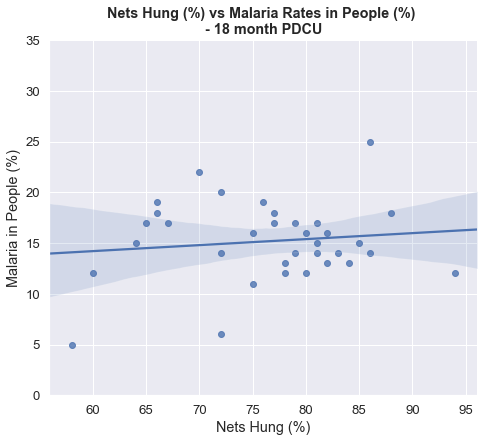

Correlation Coefficient:  0.12537040993436982
Shape of data:  (34, 3)


In [8]:
ax = sns.lmplot( x="Hung_%", y="Malaria_People_%", data=corr_columns_18, fit_reg=True,
          height=6, aspect=1.2)

plt.title('Nets Hung (%) vs Malaria Rates in People (%) \n- 18 month PDCU',fontweight='bold')
ax.set(xlabel='Nets Hung (%)', ylabel='Malaria in People (%)',ylim=(0,35))

plt.show()


print('Correlation Coefficient: ', correlation.loc['Hung_%','Malaria_People_%'])
print('Shape of data: ',corr_columns_18.shape)

Both of these plots and regression lines show a slight correlation, however the error margins demonstrate a large amount of uncertainty. From the 'shape of data' output, it can be seen that this analysis has only been performed on 34 data points (not a particularly large amount) and more data would certainly provide a more reliable conclusion. 

**Optimal Sample Size?**

Regarding the question of sample size, it is difficult to be precise (as a pearson coefficient can be calculated from as little as 2 data points). However, it is clear that more data provides less uncertainty (as I will demonstrate below). To answer this question, AMF need to find an optimal amount of data/surveys that they can obtain, whilst minimising cost (both financial and time), and whilst also minimising uncertainty in their analysis/calculations.

**Limitations of only considering one PDCU**

Both of the plots above show that Hung % is over fairly small range (60-90%), which is most likely because all of data points have been taken from same time period (maybe Hung % goes down in a region over time?). Therefore, it would be more meaningful to combine data from several time periods/surveys from the same region. This will also provide a larger data set, allowing for a more reliable calculation of correlation. 

---

### Correlation over all PDCUs combined

Now I will carry out similar analysis to above, on data from all 5 PDCU surveys (6, 12, 18, 24 and 30 months).

In [9]:
# create one dataframe that combines data from all PDCUs

total_data = pd.concat(data_dict)
total_data = total_data[['Hung_%','Malaria_Households_%','Malaria_People_%']]
total_data = total_data.apply(pd.to_numeric)

total_data.reset_index(inplace=True)
total_data.drop(['level_1'],axis=1,inplace=True)
total_data.rename(columns={'level_0': 'PDCU'}, inplace=True)
total_data.head()

,PDCU,Hung_%,Malaria_Households_%,Malaria_People_%
0,12_month_data,85,21,6
1,12_month_data,82,32,8
2,12_month_data,90,25,8
3,12_month_data,83,32,9
4,12_month_data,90,25,6


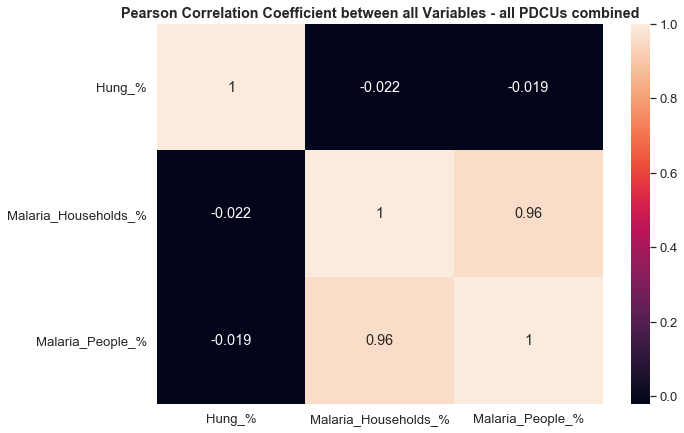

In [10]:
correlation = total_data.corr()
fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(correlation,annot=True)

plt.title('Pearson Correlation Coefficient between all Variables - all PDCUs combined',fontweight='bold')

plt.show()

This correlation heatmap shows the same strong correlation between the two malaria rates (households and people). 

Interestingly, the small postive correlation between Hung % and the malaria rates has completely disappeared, and is now showing no correlation at all (values of -0.022 and -0.019 are negligible). 

Below, I will take a closer look at each of these relationships.

### Hung % vs Malaria Household %

Here, I have produced three plots showing the relationship between the percentage of nets hung, and the rate of malaria in households. 

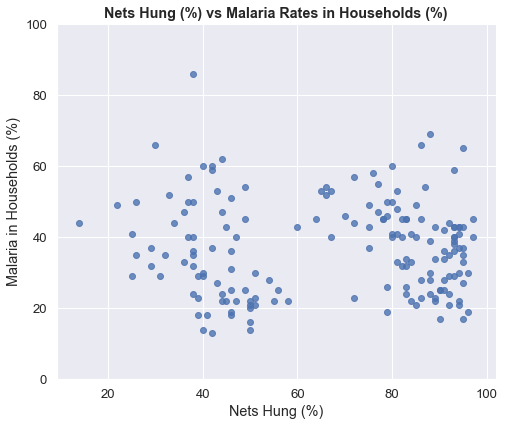

In [11]:
ax = sns.lmplot( x="Hung_%", y="Malaria_Households_%", data=total_data, fit_reg=False,
          height=6, aspect=1.2)

plt.title('Nets Hung (%) vs Malaria Rates in Households (%)',fontweight='bold')
ax.set(xlabel='Nets Hung (%)', ylabel='Malaria in Households (%)',ylim=(0,100))

plt.show()


This first plot shows very little correlation between the two variables. One interesting feature is the gap that appears (at around 60% of nets hung). The reason for this will become more apparent in the third plot. 

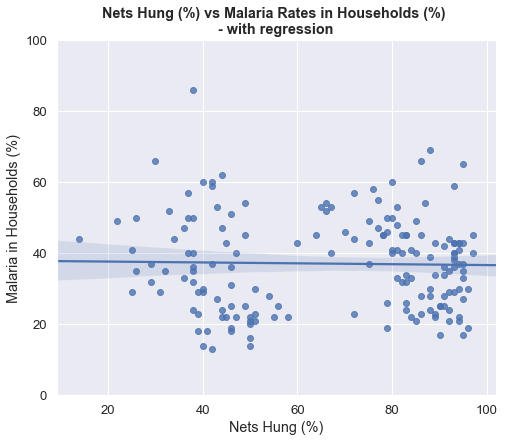

Correlation Coefficient:  -0.021854804501438244
Shape of data:  (168, 4)


In [12]:
ax = sns.lmplot( x="Hung_%", y="Malaria_Households_%", data=total_data, fit_reg=True,
               height=6, aspect=1.2)

plt.title('Nets Hung (%) vs Malaria Rates in Households (%) \n- with regression',fontweight='bold')
ax.set(xlabel='Nets Hung (%)', ylabel='Malaria in Households (%)',ylim=(0,100))

plt.show()

print('Correlation Coefficient: ',correlation.loc['Hung_%','Malaria_Households_%'])
print('Shape of data: ',total_data.shape)

This second plot includes the plotting of a regression line on the data. The error margin is much smaller than on our plot for the 18-month data, which is due to our data set increasing from 34 points to 168 points. The regression line is extremely flat, which suggests that the hang up rate of malaria nets is not linked to the rate of malaria in households. 

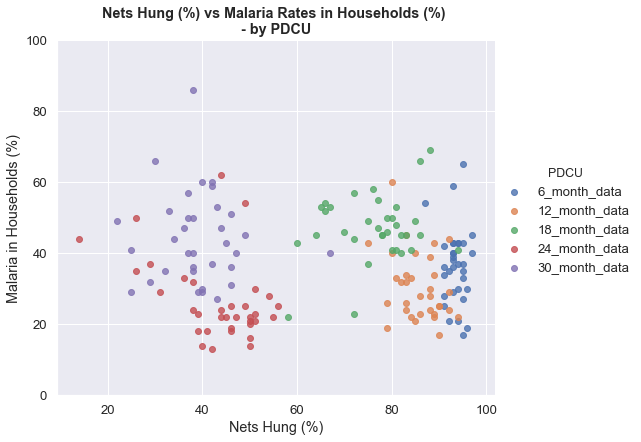

In [13]:
ax = sns.lmplot( x="Hung_%", y="Malaria_Households_%", data=total_data, fit_reg=False, hue='PDCU', 
           hue_order = ['6_month_data', '12_month_data', '18_month_data', '24_month_data', '30_month_data'],
               height=6, aspect=1.2)

plt.title('Nets Hung (%) vs Malaria Rates in Households (%) \n- by PDCU',fontweight='bold')
ax.set(xlabel='Nets Hung (%)', ylabel='Malaria in Households (%)',ylim=(0,100))

plt.show()

The third and final plot shows the same relationship, colour coded by the PDCU from which it was taken. Here there is a clear pattern of the points 'moving' to the left side of the plot as the PDCU month increases. This suggests that the hang up rate of nets decreases over time. There is less vertical movement in the points, suggesting that the malaria rate in households is more constant over time. 

The gap in data is again very clear around the 60% Nets Hung value. This looks to be due to a significant drop in Hung % between the 18-month and 24-month PDCU. I will look in to this in more detail later in the notebook. 

### Hung % vs Malaria People %

Here I have produced the same three plots, but now looking at the relationship between Hung % and Malaria Rates in People (as opposed to Households). 

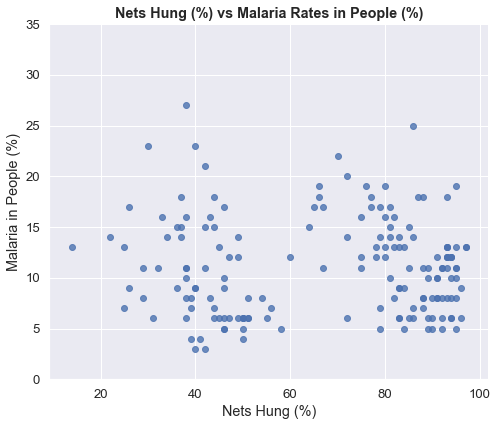

In [14]:
ax = sns.lmplot( x="Hung_%", y="Malaria_People_%", data=total_data, fit_reg=False,
               height=6, aspect=1.2)

plt.title('Nets Hung (%) vs Malaria Rates in People (%)',fontweight='bold')
ax.set(xlabel='Nets Hung (%)', ylabel='Malaria in People (%)',ylim=(0,35))

plt.show()

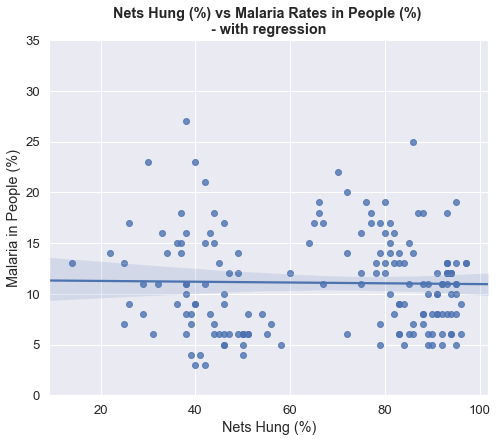

Correlation Coefficient:  -0.019035781602668354
Shape of data:  (168, 4)


In [15]:
ax = sns.lmplot( x="Hung_%", y="Malaria_People_%", data=total_data, fit_reg=True,
               height=6, aspect=1.2)

plt.title('Nets Hung (%) vs Malaria Rates in People (%) \n- with regression',fontweight='bold')
ax.set(xlabel='Nets Hung (%)', ylabel='Malaria in People (%)',ylim=(0,35))

plt.show()

print('Correlation Coefficient: ',correlation.loc['Hung_%','Malaria_People_%'])
print('Shape of data: ',total_data.shape)

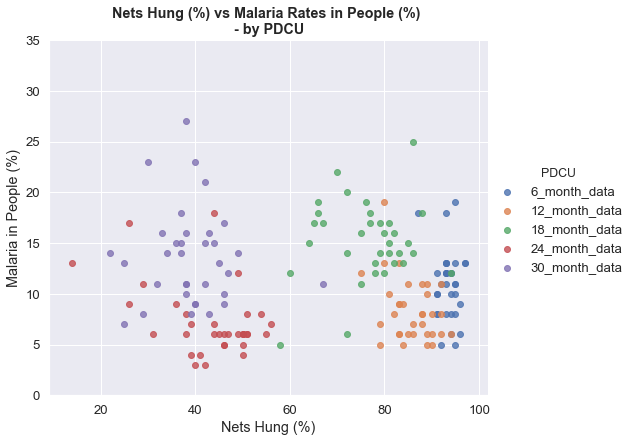

In [16]:
ax = sns.lmplot( x="Hung_%", y="Malaria_People_%", data=total_data, fit_reg=False, hue='PDCU', 
           hue_order = ['6_month_data', '12_month_data', '18_month_data', '24_month_data', '30_month_data'],
               height=6, aspect=1.2)

plt.title('Nets Hung (%) vs Malaria Rates in People (%) \n- by PDCU',fontweight='bold')
ax.set(xlabel='Nets Hung (%)', ylabel='Malaria in People (%)',ylim=(0,35))

plt.show()

Again, all three of these plots show very little correlation between the two variables. There is the same 'gap' of data at around 60% Nets Hung, and the same pattern of Nets Hung % decreasing over time. 

Next, I will consider how each of the variables varies over time. 

## Trend of Hung % and Malaria Rates over Time

Below, I have produced three plots (one for each variable) showing how they are distributed and how they vary over time. 

#### Swarm Plots

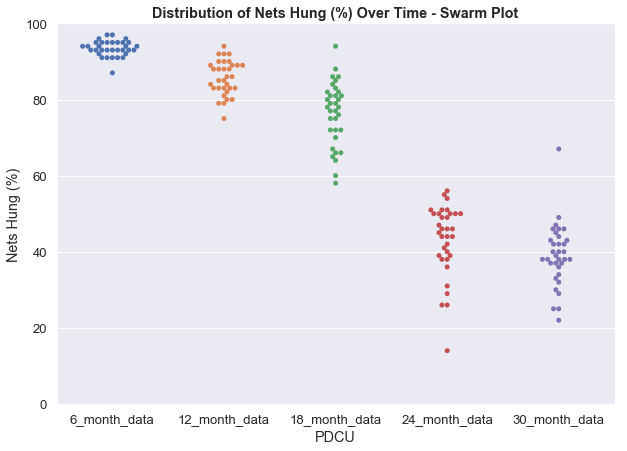

In [17]:
plt.figure(figsize=(10,7)) 
ax = sns.swarmplot(x="PDCU", y="Hung_%", data=total_data, 
              order = ['6_month_data', '12_month_data', '18_month_data', '24_month_data', '30_month_data'])

plt.title('Distribution of Nets Hung (%) Over Time - Swarm Plot',fontweight='bold')
ax.set(xlabel='PDCU', ylabel='Nets Hung (%)',ylim=(0,100))

plt.show()

As expected (from looking at the plots in the section before) there is a very clear decline in the percentage of nets hung over time. 

**Timing of Educational Activities**

The biggest drop in nets hung % is between the 18-month and 24-month surveys. The reason for this is unclear, however, there may be a need for educational activities within this time period (sometime just after the 18-month mark), which could help prevent this decline, or even provide an increase in Hung % back to a higher level. 

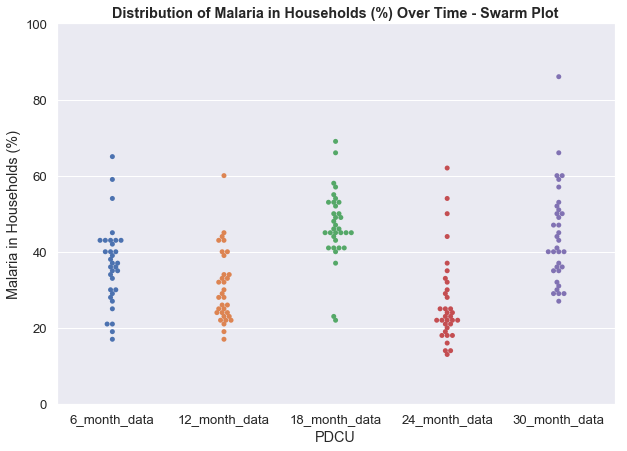

In [18]:
plt.figure(figsize=(10,7)) 
ax = sns.swarmplot(x="PDCU", y="Malaria_Households_%", data=total_data, 
              order = ['6_month_data', '12_month_data', '18_month_data', '24_month_data', '30_month_data'])

plt.title('Distribution of Malaria in Households (%) Over Time - Swarm Plot',fontweight='bold')
ax.set(xlabel='PDCU', ylabel='Malaria in Households (%)',ylim=(0,100))

plt.show()

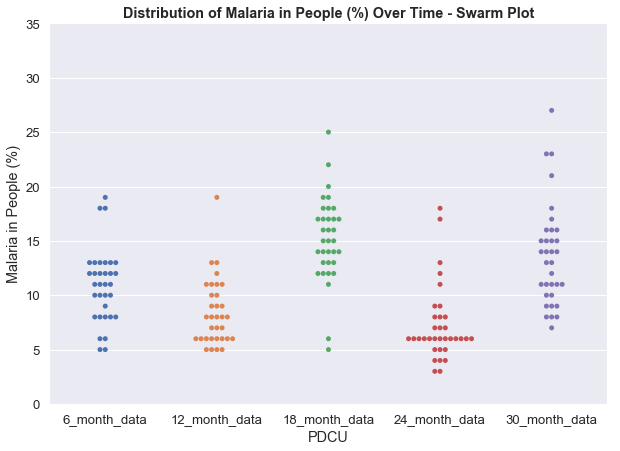

In [19]:
plt.figure(figsize=(10,7)) 
ax = sns.swarmplot(x="PDCU", y="Malaria_People_%", data=total_data, 
              order = ['6_month_data', '12_month_data', '18_month_data', '24_month_data', '30_month_data'])

plt.title('Distribution of Malaria in People (%) Over Time - Swarm Plot',fontweight='bold')
ax.set(xlabel='PDCU', ylabel='Malaria in People (%)',ylim=(0,35))

plt.show()

**Malaria Rates Over Time**

The two plots above show less of a clear trend, although they do appear to fluctuate slightly every 6 months. This could be due to malaria be seasonal (for example, peaking in the rainy season). This will be investigated and demonstrated further in the last section. 

--- 

#### Box Plots

These three plots largely show the same information as the swarm plots above, but I have decided to include them here for reference as they include a slightly clearer demonstration of the spread of data. 

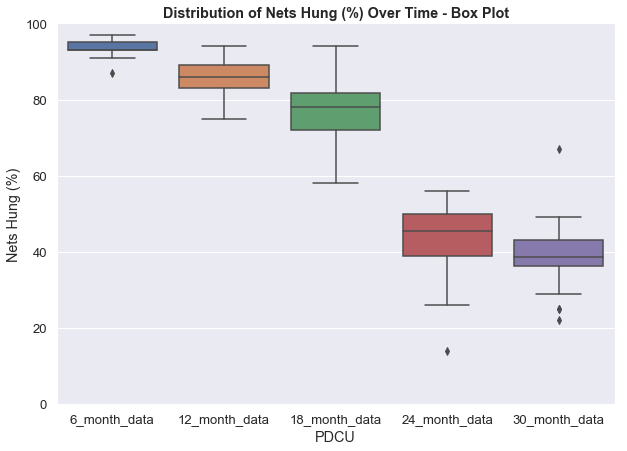

In [20]:
plt.figure(figsize=(10,7)) 
ax = sns.boxplot(x="PDCU", y="Hung_%", data=total_data, 
            order = ['6_month_data', '12_month_data', '18_month_data', '24_month_data', '30_month_data'])

plt.title('Distribution of Nets Hung (%) Over Time - Box Plot',fontweight='bold')
ax.set(xlabel='PDCU', ylabel='Nets Hung (%)',ylim=(0,100))

plt.show()

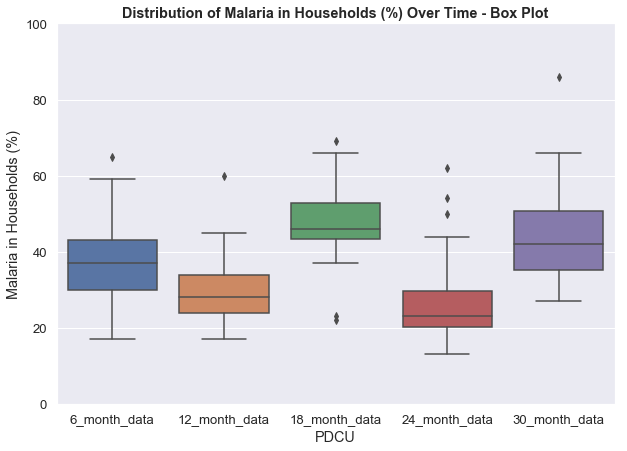

In [21]:
plt.figure(figsize=(10,7)) 
ax = sns.boxplot(x="PDCU", y="Malaria_Households_%", data=total_data, 
            order = ['6_month_data', '12_month_data', '18_month_data', '24_month_data', '30_month_data'])

plt.title('Distribution of Malaria in Households (%) Over Time - Box Plot',fontweight='bold')
ax.set(xlabel='PDCU', ylabel='Malaria in Households (%)',ylim=(0,100))

plt.show()

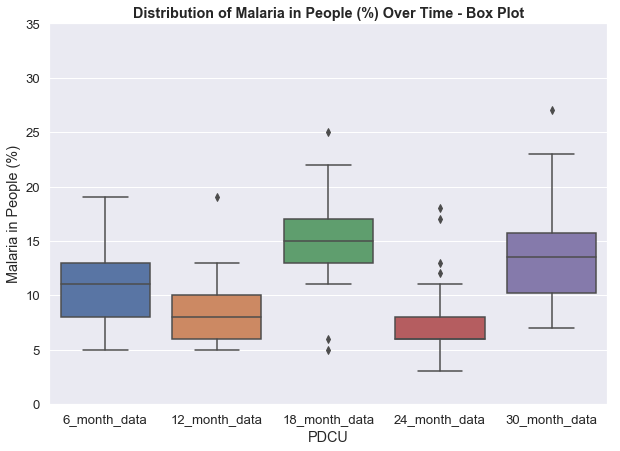

In [22]:
plt.figure(figsize=(10,7)) 
ax = sns.boxplot(x="PDCU", y="Malaria_People_%", data=total_data, 
            order = ['6_month_data', '12_month_data', '18_month_data', '24_month_data', '30_month_data'])

plt.title('Distribution of Malaria in People (%) Over Time - Box Plot',fontweight='bold')
ax.set(xlabel='PDCU', ylabel='Malaria in People (%)',ylim=(0,35))

plt.show()

---

## Rates over time of all three variables

Here I am going to look at the how the mean values of 'Hung_%', 'Malaria_Households_%' and 'Malaria_People_%' vary over the different PDCU surveys. 

In [23]:
# group data by PDCU and calculate mean value for each variable

trend_data = total_data.groupby('PDCU').mean()
trend_data.reset_index(inplace=True)
trend_data = trend_data.melt(id_vars=['PDCU'])
trend_data.rename(columns={'variable': 'Variable','value': 'Value'}, inplace=True)
trend_data

,PDCU,Variable,Value
0,12_month_data,Hung_%,85.727273
1,18_month_data,Hung_%,76.441176
2,24_month_data,Hung_%,43.147059
3,30_month_data,Hung_%,39.058824
4,6_month_data,Hung_%,93.454545
5,12_month_data,Malaria_Households_%,30.606061
6,18_month_data,Malaria_Households_%,47.000000
7,24_month_data,Malaria_Households_%,26.617647
8,30_month_data,Malaria_Households_%,44.294118
9,6_month_data,Malaria_Households_%,36.575758


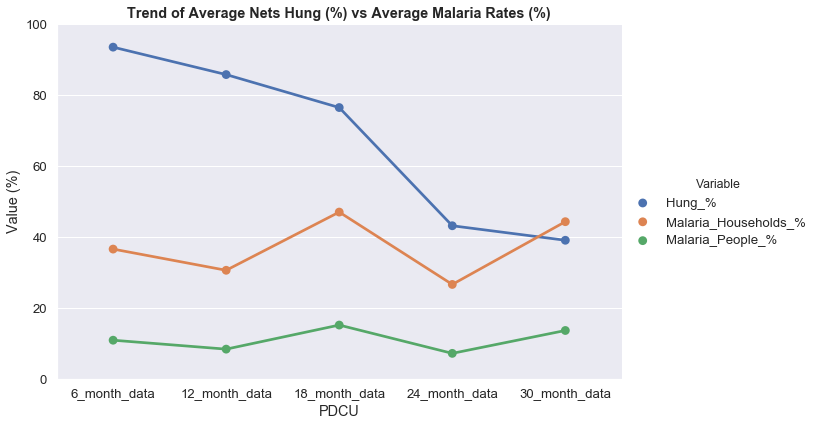

In [24]:
ax = sns.catplot(x="PDCU", y="Value", data=trend_data, hue='Variable', kind='point',
            order = ['6_month_data', '12_month_data', '18_month_data', '24_month_data', '30_month_data'],
            height=6, aspect=1.5)

plt.title('Trend of Average Nets Hung (%) vs Average Malaria Rates (%)',fontweight='bold')
ax.set(xlabel='PDCU', ylabel='Value (%)',ylim=(0,100))

plt.show()

This plot confirms that the average 'Hung_%' of nets has decreased consistently every 6 months, since distribution of the nets. The biggest decline can be seen by the sharp decrease at the 18-month mark (as discussed earlier). 

**Timing of PDCUs throughout the year**

This plot also shows more of a clear 'seasonal' change for both Malaria rates (which follow a very similar pattern), with peaks and troughs every 6 months. This may be due to malaria being seasonal and mosquito peopulations varying throughout the year. As surveys are taken every 6-months, it means that the malaria rate is only ever being observed in two months of the year (e.g. once in winter, and then once in summer, and repeat). If malaria is indeed somewhat seasonal, it would possibly be beneficial to perform PDCUs more often, or at a different interval (for example, every 5 months), in order to gain data from a wider range of months/seasons/weather etc.

## Conclusion

To go back to the introduction, the aim of my analysis was to attempt to answer several questions including:

- Is there a link between hang up rate of nets, and malaria rates?
- How do these rates change over time, after a distribution of nets?

**Is there a link between hang up rate of nets, and malaria rates?**

The results from this analysis have not shown any strong evidence that there is link or correlation between the hang up rate of nets and malaria rates in either households or people. However, I believe that the 'Hung_%' variable that was used in this analysis only applies to 'AMF Nets', which are not the only anti-mosquito nets present in the region. Additionally, this analysis did not take in to account the condition or useage of the nets. For example, nets that are in a bad condition or that aren't being used correctly may have little or no effect on protection from malaria. Therefore, for future analysis, I believe that both of these variables would also have to be taken in to account in order to make a more confident conclusion. 

This analysis also only looked at one particular region in one country. It would be very interesting to perform the same analysis over multiple regions and multiple countries, which would provide a much larger (and therefore useful) dataset. This would also allow for comparison of rates and useage between different countries and communities. 

**How do these rates change over time, after a distribution of nets?**

The last plot in particular shows a very clear trend of decreasing hang up rate of nets over time, after a distribution. This could be due to nets becoming damaged, and therefore households deciding not to use them (analysing more variables would also help in determining the reason for this). Educational activities at certain times may also help in preventing this, for example, at the 18-month PDCU point, just before there is a large decline in useage. 
Malaria rates in the region do not appear to have declined over this 30-month period, but they do show a fluctuating pattern each 6 months. 

Again, it would be much more useful to perform this analysis over several regions and countries to determine whether these trends are specific to this region, or more universal. This would also help to determine which activities and practices across different regions have been most effective. Lastly, an analysis that includes 'type of net' as a variable would be extremely interesting, as it may help AMF to determine whether certain nets are having more of an effect on malaria rates than others. 

---